In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

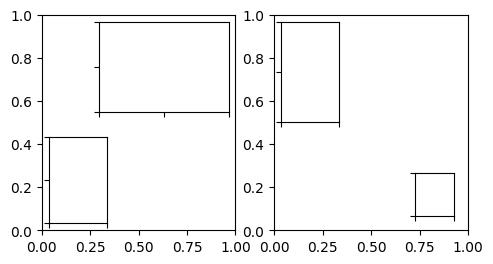

In [2]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=[5.5, 2.8])

# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=1.3, height=0.9)

# Create inset of width 30% and height 40% of the parent axes' bounding box
# at the lower left corner (loc=3)
axins2 = inset_axes(ax, width="30%", height="40%", loc=3)

# Create inset of mixed specifications in the second subplot;
# width is 30% of parent axes' bounding box and
# height is 1 inch at the upper left corner (loc=2)
axins3 = inset_axes(ax2, width="30%", height=1.0, loc=2)

# Create an inset in the lower right corner (loc=4) with borderpad=1, i.e.
# 10 points padding (as 10pt is the default fontsize) to the parent axes
axins4 = inset_axes(ax2, width="20%", height="20%", loc=4, borderpad=1)

# Turn ticklabels of insets off
for axi in [axins, axins2, axins3, axins4]:
    axi.tick_params(labelleft=False, labelbottom=False)

plt.show()

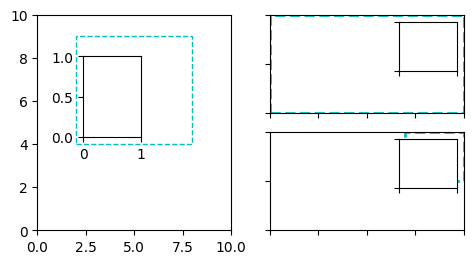

In [3]:
fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(121)

# We use the axes transform as bbox_transform. Therefore the bounding box
# needs to be specified in axes coordinates ((0, 0) is the lower left corner
# of the axes, (1, 1) is the upper right corner).
# The bounding box (.2, .4, .6, .5) starts at (.2, .4) and ranges to (.8, .9)
# in those coordinates.
# Inside of this bounding box an inset of half the bounding box' width and
# three quarters of the bounding box' height is created. The lower left corner
# of the inset is aligned to the lower left corner of the bounding box (loc=3).
# The inset is then offset by the default 0.5 in units of the font size.

axins = inset_axes(
    ax, width="50%", height="75%", bbox_transform=ax.transAxes,
    bbox_to_anchor=(.2, .4, .6, .5), loc=3,
)

# For visualization purposes we mark the bounding box by a rectangle
ax.add_patch(plt.Rectangle(
    (.2, .4), .6, .5, ls="--", ec="c",
    fc="none", transform=ax.transAxes,
))

# We set the axis limits to something other than the default, in order to not
# distract from the fact that axes coordinates are used here.
ax.set(xlim=(0, 10), ylim=(0, 10))

# Note how the two following insets are created at the same positions, one by
# use of the default parent axes' bbox and the other via a bbox in axes
# coordinates and the respective transform.
ax2 = fig.add_subplot(222)
axins2 = inset_axes(ax2, width="30%", height="50%")

ax3 = fig.add_subplot(224)
axins3 = inset_axes(
    ax3, width="100%", height="100%",
    bbox_to_anchor=(.7, .5, .3, .5),
    bbox_transform=ax3.transAxes,
)

# For visualization purposes we mark the bounding box by a rectangle
ax2.add_patch(plt.Rectangle((0, 0), 1, 1, ls="--", lw=2, ec="c", fc="none"))
ax3.add_patch(plt.Rectangle((.7, .5), .3, .5, ls="--", lw=2, ec="c", fc="none"))

# Turn ticklabels off
for axi in [axins2, axins3, ax2, ax3]:
    axi.tick_params(labelleft=False, labelbottom=False)

plt.show()

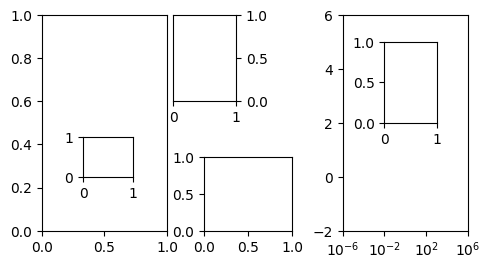

In [4]:
fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(131)

# Create an inset outside the axes
axins = inset_axes(
    ax, width="100%", height="100%", bbox_to_anchor=(1.05, .6, .5, .4),
    bbox_transform=ax.transAxes, loc=2, borderpad=0,
)
axins.tick_params(left=False, right=True, labelleft=False, labelright=True)

# Create an inset with a 2-tuple bounding box. Note that this creates a
# bbox without extent. This hence only makes sense when specifying
# width and height in absolute units (inches).
axins2 = inset_axes(
    ax, width=0.5, height=0.4, bbox_to_anchor=(0.33, 0.25),
    bbox_transform=ax.transAxes, loc=3, borderpad=0,
)

ax2 = fig.add_subplot(133)
ax2.set_xscale("log")
ax2.set(xlim=(1e-6, 1e6), ylim=(-2, 6))

# Create inset in data coordinates using ax.transData as transform
axins3 = inset_axes(
    ax2, width="100%", height="100%", bbox_to_anchor=(1e-2, 2, 1e3, 3),
    bbox_transform=ax2.transData, loc=2, borderpad=0,
)

# Create an inset horizontally centered in figure coordinates and vertically
# bound to line up with the axes.
transform = blended_transform_factory(fig.transFigure, ax2.transAxes)
axins4 = inset_axes(
    ax2, width="16%", height="34%", bbox_to_anchor=(0, 0, 1, 1),
    bbox_transform=transform, loc=8, borderpad=0,
)

plt.show()